# List 6 

### Simple naive bayes classifier





1. Acquire appropriate dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/) (script within notebook/collaboratory, using pandas for manipulation), dataset must be different then Wine, Iris, Glass. In order to have easy task, take dataset with categorical attributes (otherwise you must discretize attributes values or make assumption about normality and estimate pdf's)
2. Create function that calculate each class probability
3. Create function that calculate probabilities for given value in each class for each attribute
4. Using bayes rule create classifier that use computed probiabilities functions
5. Evaluate classifier using train/test split (randomize instances, 80% of data as train, 20% as test)
6. Compute evaluation metrics: accuracy, precission, recall, F1-score

In [1]:
import numpy as np
import pandas as pd
import random
import math

import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

Import Datasets
---------------

In [2]:
def import_tic_tac_toe_dataset():
    input_dataset = "Datasets/tic-tac-toe/tic-tac-toe.csv"

    data = pd.read_csv(input_dataset)
    X = data.iloc[:,:].values
    np.random.shuffle(X)
    label_encoder_X = LabelEncoder()
    X[:,0] = label_encoder_X.fit_transform(X[:,0])
    X[:,1] = label_encoder_X.fit_transform(X[:,1])
    X[:,2] = label_encoder_X.fit_transform(X[:,2])
    X[:,3] = label_encoder_X.fit_transform(X[:,3])
    X[:,4] = label_encoder_X.fit_transform(X[:,4])
    X[:,5] = label_encoder_X.fit_transform(X[:,5])
    X[:,6] = label_encoder_X.fit_transform(X[:,6])
    X[:,7] = label_encoder_X.fit_transform(X[:,7])
    X[:,8] = label_encoder_X.fit_transform(X[:,8])   
    
    return X

In [3]:
def import_car_dataset():

    input_dataset = "Datasets/car/car.csv"
    
    data = pd.read_csv(input_dataset)
    X = data.iloc[:,:].values  
    np.random.shuffle(X)
    
    label_encoder_X = LabelEncoder()
    X[:,0] = label_encoder_X.fit_transform(X[:,0])
    X[:,1] = label_encoder_X.fit_transform(X[:,1])
    X[:,2] = label_encoder_X.fit_transform(X[:,2])
    X[:,3] = label_encoder_X.fit_transform(X[:,3])
    X[:,4] = label_encoder_X.fit_transform(X[:,4])
    X[:,5] = label_encoder_X.fit_transform(X[:,5])
  
    return X

In [4]:
def import_balance_scale_dataset():
    input_dataset = "Datasets/balance-scale/balance-scale.csv"
   
    data = pd.read_csv(input_dataset)
    data = data.iloc[:,:].values
    
    np.random.shuffle(data)

    return data

In [5]:
def import_monks_dataset():
    input_dataset = "Datasets/monks/monks-1.csv"
   
    data = pd.read_csv(input_dataset)
    data = data.iloc[:,:].values
    np.random.shuffle(data)

    return data

Import and Split Dataset
----------------

In [6]:
def import_dataset(id):
    if id == 1:
        dataset = import_car_dataset()
    elif id == 2:
        dataset = import_balance_scale_dataset()
    elif id == 3:
        dataset = import_monks_dataset()
    else:
        dataset = import_tic_tac_toe_dataset()
    return dataset

In [92]:
def split_data_for_built_in_classificator(train, test, split_ratio):    

    X_train = np.array(train)[:,0:-1]
    X_test = np.array(test)[:,0:-1]
    y_train = np.array(train)[:,-1]
    y_test = np.array(test)[:,-1]
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))
    
    return X_train, X_test, y_train, y_test

def split_data_for_own_classificator(dataset, split_ratio):
    trainSize = int(len(dataset) * split_ratio)
    trainSet = []
    testSet = list(dataset)
#     index = 0
    while len(trainSet) < trainSize:
#         index = random.randrange(len(testSet))
        trainSet.append(testSet.pop())
#         index = index + 1
    return [trainSet, testSet]

Built-In Classificators
---------------

In [122]:
def multinomial_classificator(X_train, X_test, y_train, y_test):
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return clf, y_pred

def gauss_classificator(X_train, X_test, y_train, y_test):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return clf, y_pred

Own Classificator Functions
============

Class Summary
---------------------

In [9]:
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

def separate_by_class(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

def summarize(dataset):
    summaries = [(np.mean(attribute), np.std(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

Class Preditction
-----------------

In [10]:
def get_predictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return np.array(predictions)

def predict(summaries, inputVector):
    probabilities = calculate_class_probabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

def calculate_class_probabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculate_probability(x, mean, stdev)
    return probabilities

def calculate_probability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

Classification Statistics
---------------

In [11]:
def confusion_matrix_generator(Y_test, Y_pred):
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    img = plt.matshow(cm, cmap=plt.cm.autumn)
    plt.colorbar(img, fraction=0.045)
    for x in range(cm.shape[0]):
        for y in range(cm.shape[1]):
            plt.text(x, y, "%0.2f" % cm[x,y], 
                     size=12, color='black', ha="center", va="center")
    plt.show()

In [12]:
def print_classification_statistics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print (classification_report(y_test, y_pred))
    print('Accuracy: {0}'.format(accuracy))
    confusion_matrix_generator(y_test, y_pred)    

Main Program
--------------

In [37]:
def main(split_ratio, dataset_id, classificator):
    dataset = import_dataset(dataset_id)
    training_set, test_set = split_data_for_own_classificator(dataset, split_ratio)
    if classificator == 1:
        summaries = summarize_by_class(training_set)
        y_pred = get_predictions(summaries, test_set)
        y_test = np.array(test_set)[:,-1]
    else:
        X_train, X_test, y_train, y_test = split_data_for_built_in_classificator(training_set, test_set, split_ratio)
        if classificator == 2:
            clf, y_pred = gauss_classificator(X_train, X_test, y_train, y_test)
        else:
            clf, y_pred = multinomial_classificator(X_train, X_test, y_train, y_test)    
            
    print_classification_statistics(y_test, y_pred)

Working Part of Program
=================

**main(split_ratio, dataset, classificator)**

**Classificator:**
0. Own classificator
1. Gaussian Classificator
2. Multinomial Classificator

             precision    recall  f1-score   support

          0       0.69      0.66      0.67        61
          1       0.61      0.65      0.63        51

avg / total       0.65      0.65      0.65       112

Accuracy: 0.6517857142857143


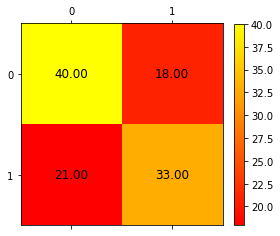

There are 444 samples in the training set and 112 samples in the test set
             precision    recall  f1-score   support

          0       0.67      0.74      0.70        57
          1       0.69      0.62      0.65        55

avg / total       0.68      0.68      0.68       112

Accuracy: 0.6785714285714286


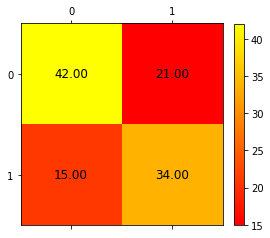

There are 444 samples in the training set and 112 samples in the test set
             precision    recall  f1-score   support

          0       0.69      0.62      0.65        60
          1       0.60      0.67      0.64        52

avg / total       0.65      0.64      0.64       112

Accuracy: 0.6428571428571429


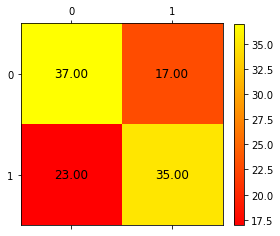

In [125]:
main(0.8, 3, 1)
main(0.8, 3, 2)
main(0.8, 3, 3)